<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Covariance" data-toc-modified-id="Covariance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Covariance</a></span></li><li><span><a href="#Pearson-Correlation-Coefficient" data-toc-modified-id="Pearson-Correlation-Coefficient-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pearson Correlation Coefficient</a></span></li><li><span><a href="#Spearman-Correlation-Coefficient" data-toc-modified-id="Spearman-Correlation-Coefficient-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Spearman Correlation Coefficient</a></span></li><li><span><a href="#Kendall-Correlation-Coefficient" data-toc-modified-id="Kendall-Correlation-Coefficient-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Kendall Correlation Coefficient</a></span></li><li><span><a href="#总结" data-toc-modified-id="总结-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>总结</a></span></li></ul></div>

三个相关性系数（pearson, spearman, kendall）反应的都是两个变量之间变化趋势的方向以及程度，其值范围为-1到+1，0表示两个变量不相关，正值表示正相关，负值表示负相关，值越大表示相关性越强。

0.8-1.0     极强相关

0.6-0.8     强相关

0.4-0.6     中等程度相关

0.2-0.4     弱相关

0.0-0.2     极弱相关或无相关

In [10]:
import pandas as pd
df = pd.read_excel('GainesvilleHomesR.xlsx')
df.head()

,SquareFootage,LotSize,BedsBaths,CommuteToUF,YearBuilt,Days,ElemScDistance,MidScDistance,HighScDistance,Price
0,1369,0.21900,4.5,17,1967,53,1.0,1.8,0.7,70000
1,572,0.13000,3.0,13,1943,74,0.1,2.6,0.8,85000
2,1254,0.18999,5.0,16,2007,4,0.7,0.9,1.0,99900
3,984,0.40000,4.0,15,1975,81,2.6,1.8,1.5,99900
4,1144,0.33000,5.0,17,1968,42,0.4,1.1,1.0,105800


In [11]:
df.describe()

,SquareFootage,LotSize,BedsBaths,CommuteToUF,YearBuilt,Days,ElemScDistance,MidScDistance,HighScDistance,Price
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,1639.228571,0.364768,5.200000,18.500000,1985.400000,42.685714,1.258571,2.742857,2.450000,205234.671429
std,443.031689,0.342911,0.945623,4.099311,18.683016,26.086002,1.001954,2.035309,1.446109,60151.270807
min,572.000000,0.039850,3.000000,9.000000,1938.000000,1.000000,0.100000,0.200000,0.200000,70000.000000
25%,1365.250000,0.200000,5.000000,16.000000,1973.250000,19.250000,0.525000,1.525000,1.325000,170925.000000
50%,1584.500000,0.265000,5.000000,19.000000,1985.000000,45.000000,1.250000,2.450000,2.600000,196900.000000
75%,1937.000000,0.367500,6.000000,22.000000,2000.000000,66.000000,1.675000,3.275000,3.300000,253750.000000
max,2826.000000,2.140000,10.000000,25.000000,2017.000000,83.000000,7.000000,10.100000,9.300000,329900.000000


## Covariance

要理解相关系数，首先要理解协方差（Covariance），协方差是一个反映两个随机变量相关程度的指标，如果一个变量跟随着另一个变量同时变大或者变小，那么这两个变量的协方差就是正值, 两者正相关，反之协方差是负值，负相关，公式如下：

$$ cov(X,Y) = \frac{\sum^{i=1}_n(X_i - \bar X)(Y_i - \bar Y)}{(n-1)} $$

In [25]:
import numpy as np

Firstly, we use a simple matrix as below:
$$
\begin{bmatrix}
1 & 2 & 3\\
2 & 4 & 5\\
3 & 6 & 1
\end{bmatrix}
\quad
$$
The column is different valus under certain features.

In [74]:
dfmatrix = pd.DataFrame({'X':[1,2,3],'Y':[2,4,6],'Z':[3,5,1]})
dfmatrix

,X,Y,Z
0,1,2,3
1,2,4,5
2,3,6,1


In [75]:
dfmatrix.values

array([[1, 2, 3],
       [2, 4, 5],
       [3, 6, 1]])

In [83]:
# caculate the average for x,y and z and subtract from it
dfmean = dfmatrix - dfmatrix.mean().values
dfmean

,X,Y,Z
0,-1.0,-2.0,0.0
1,0.0,0.0,2.0
2,1.0,2.0,-2.0


In [87]:
# we have 3 dimension, which is x, y and z, so we need to calculate the cov of each pair
# for example, cov(X,Y) is:
print(f"cov(X,Y) is {0.5*(dfmean['X'][0]*dfmean['Y'][0] + dfmean['X'][1]*dfmean['Y'][1] + dfmean['X'][2]*dfmean['Y'][2])}")
# cov(Y,Z) is:
print(f"cov(Y,Z) is {0.5*(dfmean['Y'][0]*dfmean['Z'][0] + dfmean['Y'][1]*dfmean['Z'][1] + dfmean['Y'][2]*dfmean['Z'][2])}")

cov(X,Y) is 2.0
cov(Y,Z) is -2.0


In [78]:
dfmean.T

,0,1,2
X,-1.0,0.0,1.0
Y,-2.0,0.0,2.0
Z,0.0,2.0,-2.0


In [86]:
# get the cov matrix
dfmean.T.values.dot(dfmean.values)/(3-1)

array([[ 1.,  2., -1.],
       [ 2.,  4., -2.],
       [-1., -2.,  4.]])

我们所要计算的，是特征之间的协方差。习惯上，每一行表示一个样本，每一列表由所有样本的某个特征组成。但是在计算协方差时，特征向量应该横过来，故调用方式应该是np.cov(arr.T)

In [88]:
# if we use np.cov()
np.cov(dfmatrix.T)

array([[ 1.,  2., -1.],
       [ 2.,  4., -2.],
       [-1., -2.,  4.]])

$$
\begin{bmatrix}
cov(X,X)=1 & cov(X,Y)=2 & cov(X,Z)=-1\\
cov(Y,X)=2 & cov(Y,Y)=4 & cov(Y,Z)=-2\\
cov(Z,X)=-1 & cov(Z,Y)=-2 & cov(Z,Z)=4
\end{bmatrix}
\quad
$$

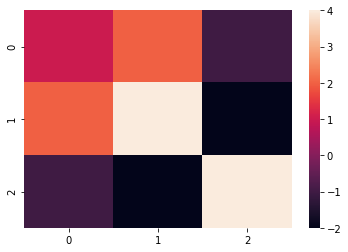

In [94]:
# create a heatmap
import matplotlib.pyplot as mp, seaborn
seaborn.heatmap(np.cov(dfmatrix.T), annot=False)
mp.show()

## Pearson Correlation Coefficient

*用来评估两个连续变量之间的线性关系*

由公式下面可知，Pearson相关系数是用协方差除以两个变量的标准差得到的，虽然协方差能反映两个随机变量的相关程度（协方差大于0的时候表示两者正相关，小于0的时候表示两者负相关），但是协方差值的大小并不能很好地度量两个随机变量的关联程度，例如，现在二维空间中分布着一些数据，我们想知道数据点坐标X轴和Y轴的相关程度，如果X与Y的相关程度较小但是数据分布的比较离散，这样会导致求出的协方差值较大，用这个值来度量相关程度是不合理的。

$$ \rho(X,Y) = corr(X,Y) = \frac{cov(X,Y)}{\sigma_X \sigma_Y} = \frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X \sigma_Y}$$

公式的分母是变量的标准差，这就意味着计算皮尔森相关性系数时，__变量的标准差不能为0（分母不能为0)__，也就是说你的两个变量中任何一个的值不能都是相同的。如果没有变化，用皮尔森相关系数是没办法算出这个变量与另一个变量之间是不是有相关性的。

实验数据通常假设是成对的__来自于正态分布的总体__。为啥通常会假设为正态分布呢？因为我们在求皮尔森相关性系数以后，通常还会用t检验之类的方法来进行皮尔森相关性系数检验，而 t检验是基于数据呈正态分布的假设的。

实验数据之间的差距不能太大，或者说皮尔森相关性系数受异常值的影响比较大。比如心跳与跑步的例子，万一这个人的心脏不太好，跑到一定速度后承受不了，突发心脏病，那这时候我们会测到一个偏离正常值的心跳（过快或者过慢，甚至为0），如果我们把这个值也放进去进行相关性分析，它的存在会大大干扰计算的结果的。

假设：

- 所有变量都是连续型变量
- 观察值匹配：数据在变量之间需要匹配对应
- 待检验的样本分布接近满足正态分布
- 无异常值
- 两个变量之间是直线关系

In [96]:
df.corr(method='pearson')

,SquareFootage,LotSize,BedsBaths,CommuteToUF,YearBuilt,Days,ElemScDistance,MidScDistance,HighScDistance,Price
SquareFootage,1.000000,0.306154,0.758790,0.043116,0.350429,-0.017502,0.181256,0.153781,0.215978,0.849660
LotSize,0.306154,1.000000,0.484639,-0.118901,-0.080662,0.197828,0.078081,0.002880,0.033148,0.323804
BedsBaths,0.758790,0.484639,1.000000,-0.016824,0.319845,0.096589,0.142714,0.071160,0.189708,0.560383
CommuteToUF,0.043116,-0.118901,-0.016824,1.000000,0.600620,0.096497,0.336797,0.282095,0.516703,0.178901
YearBuilt,0.350429,-0.080662,0.319845,0.600620,1.000000,0.148471,0.320258,0.333337,0.531643,0.406121
Days,-0.017502,0.197828,0.096589,0.096497,0.148471,1.000000,-0.073366,0.090337,-0.079296,0.035554
ElemScDistance,0.181256,0.078081,0.142714,0.336797,0.320258,-0.073366,1.000000,0.400711,0.269813,0.214635
MidScDistance,0.153781,0.002880,0.071160,0.282095,0.333337,0.090337,0.400711,1.000000,0.343056,0.103865
HighScDistance,0.215978,0.033148,0.189708,0.516703,0.531643,-0.079296,0.269813,0.343056,1.000000,0.313228
Price,0.849660,0.323804,0.560383,0.178901,0.406121,0.035554,0.214635,0.103865,0.313228,1.000000


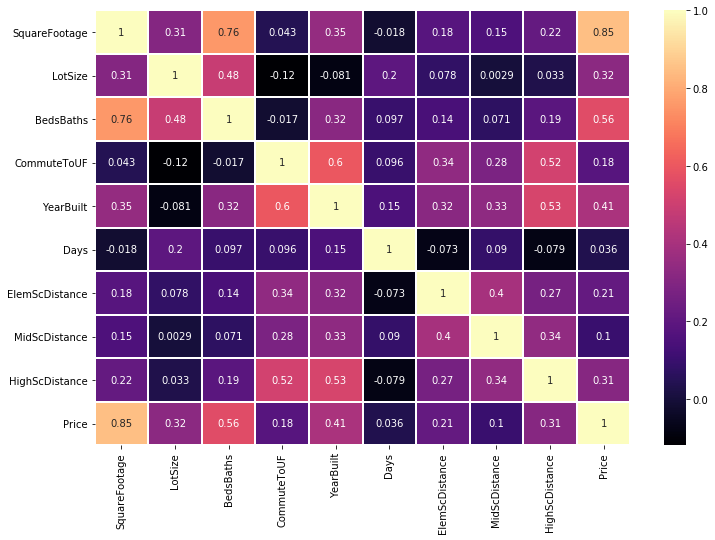

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(method='pearson'),cmap='magma',linecolor='white',linewidths=1, annot = True )

## Spearman Correlation Coefficient

*用于评估与顺序变量相关的关系*

https://zh.wikipedia.org/wiki/%E6%96%AF%E7%9A%AE%E5%B0%94%E6%9B%BC%E7%AD%89%E7%BA%A7%E7%9B%B8%E5%85%B3%E7%B3%BB%E6%95%B0

斯皮尔曼相关性系数，通常也叫斯皮尔曼秩相关系数。“秩”，可以理解成就是一种顺序或者排序，那么它就是根据原始数据的排序位置进行求解，这种表征形式就没有了求皮尔森相关性系数时那些限制。下面来看一下它的计算公式：

$$ \rho = 1 - \frac{\sigma\sum^N_{i=1}d_i^2}{N(N^2-1)}  $$

斯皮尔曼等级相关系数是一种非参数方法，对数据分布没有要求。假定包括：

- 所有变量都应该是连续型变量，或者可排序的分类变量（例如，变量值有“好”、“一般”、“不好”三种，我们把它们依次定义为3，2，1，即可用等级排列）
- 变量之间为单向关系（如下入，图1、图2满足单项关系，图3不满足单项关系）

In [103]:
df.corr(method='spearman')

,SquareFootage,LotSize,BedsBaths,CommuteToUF,YearBuilt,Days,ElemScDistance,MidScDistance,HighScDistance,Price
SquareFootage,1.000000,0.219077,0.725698,0.110529,0.315702,-0.001261,0.149695,0.048430,0.192979,0.842541
LotSize,0.219077,1.000000,0.240562,-0.177592,-0.287863,0.064174,0.079073,0.025001,-0.176208,0.149288
BedsBaths,0.725698,0.240562,1.000000,0.125333,0.322561,0.013981,0.147622,0.063780,0.196879,0.604902
CommuteToUF,0.110529,-0.177592,0.125333,1.000000,0.599262,0.101428,0.356860,0.287905,0.617916,0.227557
YearBuilt,0.315702,-0.287863,0.322561,0.599262,1.000000,0.130321,0.403954,0.201673,0.581910,0.443066
Days,-0.001261,0.064174,0.013981,0.101428,0.130321,1.000000,0.018783,-0.060678,-0.001455,0.095552
ElemScDistance,0.149695,0.079073,0.147622,0.356860,0.403954,0.018783,1.000000,0.477192,0.283714,0.260237
MidScDistance,0.048430,0.025001,0.063780,0.287905,0.201673,-0.060678,0.477192,1.000000,0.445169,0.001908
HighScDistance,0.192979,-0.176208,0.196879,0.617916,0.581910,-0.001455,0.283714,0.445169,1.000000,0.271780
Price,0.842541,0.149288,0.604902,0.227557,0.443066,0.095552,0.260237,0.001908,0.271780,1.000000


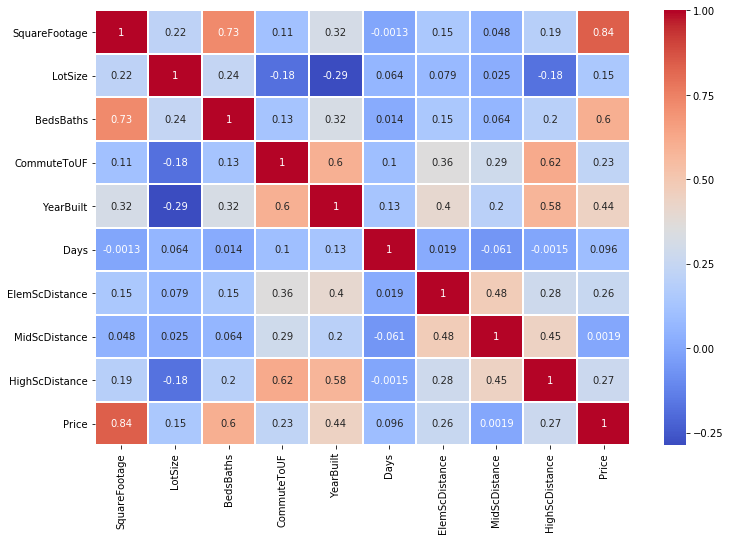

In [108]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(method='spearman'),cmap='coolwarm',linecolor='white',linewidths=1, annot = True)

## Kendall Correlation Coefficient

*测量两个测量量之间的序数关联的统计量*

肯德尔等级相关系数也是一种非参数方法，对数据分布没有要求。需要满足的假定和斯皮尔曼秩相关系数相同：

- 所有变量都应该是连续型变量，或者可排序的分类变量
- 变量之间的关系呈单一方向

斯皮尔曼等级系数和肯德尔等级系数看起来很像，那么到底该用哪个呢？

一般来说，对同样的数据进行检验，斯皮尔曼等级系数多数情况下会比肯德尔等级系数大（这可能是斯皮尔曼使用得更普遍的原因，相关性强显得好看，道理大家都懂的）。

不过其实，肯德尔等级系数总体来说是更有优势的：

- 相关关系更易于解释
- 是对总体参数的更好的估计
- 在样本较小时（比如小于12）更为精确

当然，因为斯皮尔曼等级系数是用等级的差值（而非等级本身）计算的，因此对异常值更为敏感的。如果有个别样本的关系较大地偏离总体的相关关系，斯皮尔曼等级相关系数就会低很多，有可能会低于肯德尔系数得出的系数值。所以如果需要对相关关系的异常情况较为敏感的检验，斯皮尔曼等级系数会是一个好选择。

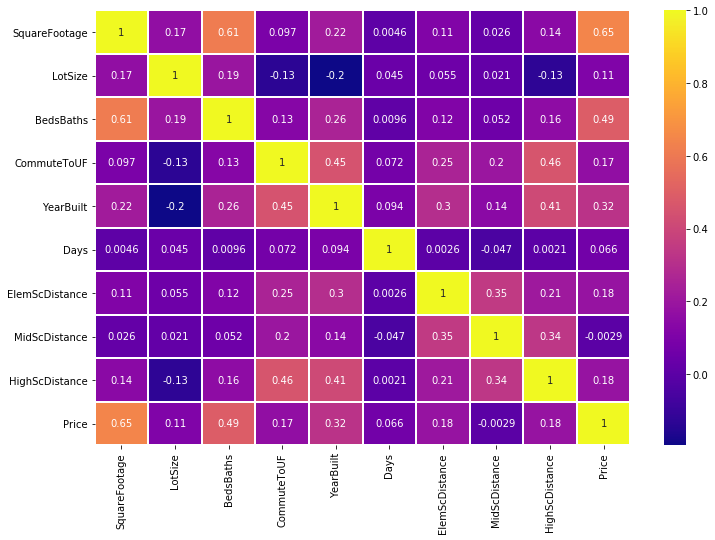

In [116]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(method='kendall'),cmap='plasma',linecolor='white',linewidths=1, annot = True)

## 总结
计算积距pearson相关系数，连续性变量才可采用;计算Spearman秩相关系数，适合于定序变量或不满足正态分布假设的等间隔数据; 计算Kendall秩相关系数，适合于定序变量或不满足正态分布假设的等间隔数据。